We Will be implementing Regression using Neural Network , i.e Predicting values of dependent variable using independent input features

In [25]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [26]:
import numpy as np
import matplotlib.pyplot as plt

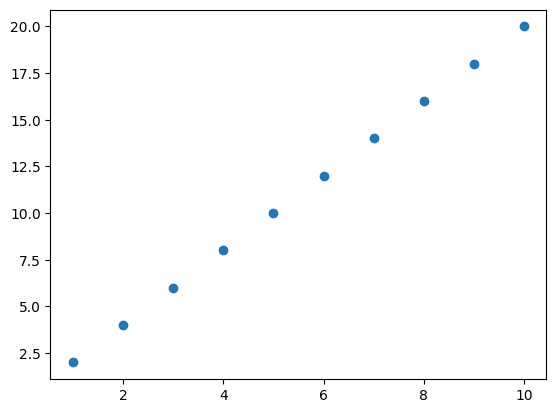

In [27]:
# Basic Regression Formulation using Numpy

a = np.array([1,2,3,4,5,6,7,8,9,10])
b= np.array([2,4,6,8,10,12,14,16,18,20])

# (y = 2x)
# For accessing we use x[0].ndim we gwt no dimensions as it is an array of scalar values and no dimensions
plt.scatter(a,b)
plt.show()

In [28]:
# Using Tensorflow or tensors

House_features = tf.constant(["Bedrooms","Bathrooms","Area"])
Price = tf.constant([74000])

print(House_features,Price)
print(f"Input Features Shape : {House_features.shape}")
print(f"Output Shape : {Price.shape}")

tf.Tensor([b'Bedrooms' b'Bathrooms' b'Area'], shape=(3,), dtype=string) tf.Tensor([74000], shape=(1,), dtype=int32)
Input Features Shape : (3,)
Output Shape : (1,)


# Converting numpy arrays to tensors

---



In [29]:
X = tf.constant(a)
y = tf.constant(b)

In [30]:
print(X,y)
print(f"Shape of X : {X.shape},  y : {y.shape}")
#But it is a regression probelm so we need X[] scalar value to predict a scalar value y[] respectively
print(X[1].shape) # void means 0 dimensions or scalar value

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int64) tf.Tensor([ 2  4  6  8 10 12 14 16 18 20], shape=(10,), dtype=int64)
Shape of X : (10,),  y : (10,)
()


### Steps for modelling a neural network

* Make the data into proper format after preprocessing and EDA
* One can also pick a model prebuilt or formulate through scratch using the steps (1) below

1. Create a model : Define input output and hidden layers
2. Compile the model : Define loss function and a optimizer function and evaluation matrix
3. Fitting a model : Letting our model try to generalize the predictions using X,y from training set
4. Evaluate the model : Evaluate on the testing dataset
5. Improve through Experimentation
6. Save and load the finetuned model

# Note :

This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).

This results in a shape error (remember one of most common errors in deep learning is input and output shapes).

In [31]:
tf.random.set_seed(78)

# Defining the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)# will throw error as it requires minimum 2 dimensional X and for our example we have 1 dimensional X

])

# Compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X,y,epochs=5) # will throw error
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 355ms/step - loss: 9.0584 - mae: 9.0584
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.7459 - mae: 8.7459
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.4334 - mae: 8.4334
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 8.1209 - mae: 8.1209
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 7.8084 - mae: 7.8084


In [32]:
y_pred = model.predict([12])

1/1 [==============================] - 0s 60ms/step


In [33]:
print(y_pred) # as mae us 5.192 we can say that y lies
print(y_pred-5.192,"<y<",y_pred+5.192)
#Which is still off thus we need to train more and tune the hyperparameters

[[7.586276]]
[[2.3942761]] <y< [[12.778276]]


# Improving the model

Can be done by updating or altering the steps taken while creating a model

1. **Adding Layers to Model** : we can also change the number of neurons per layer , the activation function can also be altered to get the desired results

2. **Compiling The Model** : here we might change the optimization function or its learning rate

3. **Fitting The Model** We might fit the model with more iteration or epochs

# Lets try optimizing our last model

M1 )=> Increasing the epochs

In [34]:
# Defining the model
mod1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)# will throw error as it requires minimum 2 dimensional X and for our example we have 1 dimensional X

])

# Compiling
mod1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X,y,epochs=5) # will throw error
mod1.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 5.3637 - mae: 5.3637
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 5.0512 - mae: 5.0512
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 4.7387 - mae: 4.7387
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 4.4262 - mae: 4.4262
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 4.1137 - mae: 4.1137
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 3.8012 - mae: 3.8012
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 3.4887 - mae: 3.4887
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 3.1762 - mae: 3.1762
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 2.8637 - mae: 2.8637
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 2.5512 - mae: 2.5512
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 

In [37]:
y_pred = mod1.predict([12])
print(f"predicted:{y_pred} \nactual :{12*2}") # which is very close
print(y_pred-0.2786,"<y<",y_pred+0.2786)

1/1 [==============================] - 0s 54ms/step
predicted:[[23.961384]] 
actual :24
[[23.682783]] <y< [[24.239985]]


2. mod2)=> We will add a layer and change the oprtimization function

In [63]:
mod2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
mod2.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.1199),
             metrics = ["mae"])
mod2.fit(tf.expand_dims(X,axis = -1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 593ms/step - loss: 9.2133 - mae: 9.2133
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1429 - mae: 9.1429
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0730 - mae: 9.0730
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0033 - mae: 9.0033
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9335 - mae: 8.9335
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8635 - mae: 8.8635
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7933 - mae: 8.7933
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7228 - mae: 8.7228
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6522 - mae: 8.6522
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5814 - mae: 8.5814
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - lo

In [66]:
y_pred = mod2.predict([12])
print(f"predicted:{y_pred} \nactual :{12*2}") # which is very close comparatively to the base model
print(y_pred-0.8084,"<y<",y_pred+0.8084)

1/1 [==============================] - 0s 58ms/step
predicted:[[21.861393]] 
actual :24
[[21.052994]] <y< [[22.669792]]
